# IEOR 4703 -- Monte Carlo Simulation for FE


### Hamiltonian Monte Carlo on Bivariate Normal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
def evaluateU(q, rho):

    U = 0.5*(q[0]**2 + q[1]**2 - 2*rho*q[0]*q[1])/(1-rho**2)
    return U


def gradientU(q, rho):

    d = len(q) # must be 2
    gradU = np.zeros(d)
    gradU[0] = (q[0] - rho*q[1])/(1 - rho**2)
    gradU[1] = (q[1] - rho*q[0])/(1 - rho**2)
    return gradU



def algorithm_HMC(q_current, e, L, rho, flag):

    # consistent with Algorithm 1 in Lecture Notes
    q = q_current
    d = len(q)

    p = np.random.randn(d);
    p_current = p


    if flag == 1:

        # At the beginning, make a half step for momentum
        gradU = gradientU(q, rho)
        p = p - (e/2)*gradU
        # alternate full steps for p & q
        for i in range(L):
            q = q + e*p # make a full step for the position
            if i < L-1:
                # make a full step for the momentum, except at the end of the trajectory
                gradU = gradientU(q, rho)
                p = p - e*gradU
            else:
                # make a half step for the momentum at the end of the trajectory
                #p = p - e*gradU
                p = p - (e/2)*gradU
        # To make the proposal symmetric, negate momentum at the end of trajectory
        p = -p

    else:

        for i in range(L):
            gradU = gradientU(q, rho)
            p = p - 0.5*e*gradU
            q = q + e*p
            gradU = gradientU(q, rho)
            p = p - 0.5*e*gradU


    # Evaluate potential & kinetic energies to start and end the trajectory
    U = evaluateU(q_current, rho)
    K = np.sum(p_current**2)/2

    # proposed U
    U_tilde = evaluateU(q, rho)
    # proposed K
    K_tilde = np.sum(p**2)/2

    # accept/reject the state at the end of trajectory.
    # i.e. returning either the position at the end of the trajectory or the
    # initial position

    u = np.random.rand()

    if u < np.exp(U - U_tilde + K - K_tilde):
        qNew = q
    else:
        qNew = q_current

    return qNew

In [ ]:
m = 10000
qArray = np.zeros((m + 1, 2))
qArray[0] = np.array([-1.50 -1.55])

rho = 0.98
e = 0.045
L = 5
flag = 1

for i in range(m):

    qArray[i + 1] = algorithm_HMC(qArray[i], e, L, rho, flag)

x1Array = qArray[:,0];
x2Array = qArray[:,1];

### Traceplots

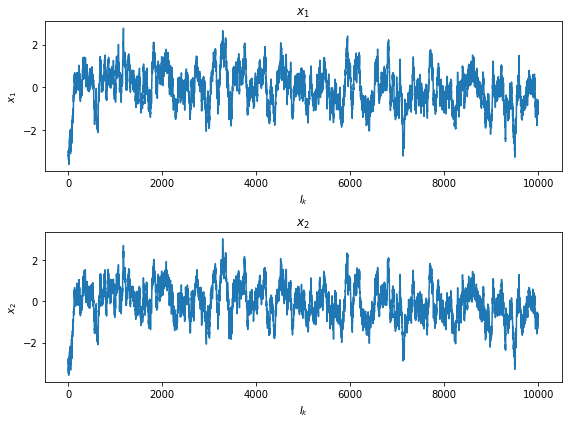

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(x1Array)
plt.xlabel('$I_k$')
plt.ylabel('$x_1$')
plt.title('$x_1$')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(x2Array)
plt.xlabel('$I_k$')
plt.ylabel('$x_2$')
plt.title('$x_2$')
plt.tight_layout()

plt.show()

### Running Average

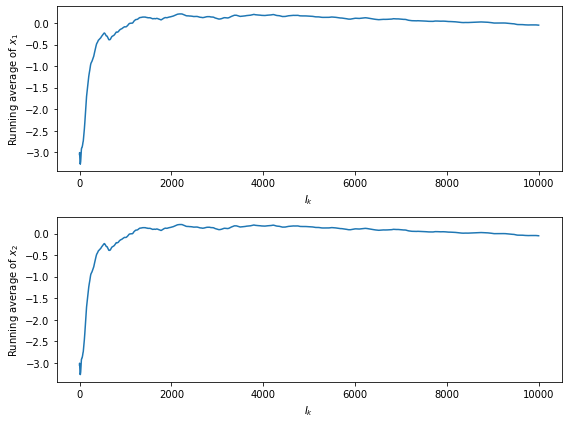

In [ ]:
x1RunningAvg = np.cumsum(x1Array) / np.arange(1, m + 2)
x2RunningAvg = np.cumsum(x1Array) / np.arange(1, m + 2)

plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(x1RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_1$')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x2RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_2$')
plt.tight_layout()

plt.show()

### Assessment by eye-balling

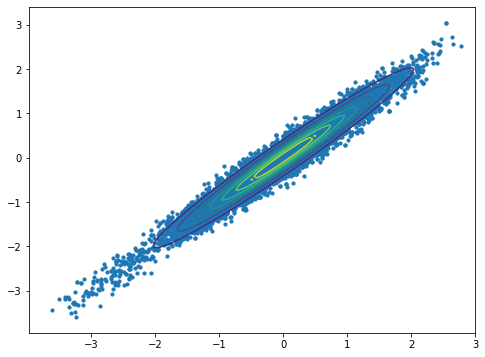

In [ ]:
plt.figure(figsize = (8, 6))
x, y = np.meshgrid(np.linspace(-3, 3, 80), np.linspace(-3, 3, 80))
pos = np.dstack((x, y))
rv = multivariate_normal(np.array([0, 0]), np.array([[1.,rho],[rho,1.]]))
plt.contour(x, y, rv.pdf(pos))
plt.scatter(x1Array, x2Array, s=10)
plt.show()